# 1.  Data cleaning and analyzing

**<font color='green'>A. Read in the datasets and concatenate them</font>**

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [2]:
data1 = pd.read_csv('01-2011-04-2011.csv', sep=';', encoding = "ISO-8859-1")
data2 = pd.read_csv('05-2011-03-2013.csv', sep=';', encoding = "ISO-8859-1")
data3 = pd.read_csv('04-2013-04-2016.csv', sep=';', encoding = "ISO-8859-1")
data4 = pd.read_csv('05-2016-07-2020.csv', sep=';', encoding = "ISO-8859-1")
data5 = pd.read_csv('08-2020.csv', sep=';', encoding = "ISO-8859-1")
data6 = pd.read_csv('09-2020.csv', sep=';', encoding = "ISO-8859-1")

C:\Users\silverko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
datas = [data1, data2, data3, data4, data5, data6]
data = pd.concat(datas) 
data.to_csv('concatenated_new_cars.csv', sep=';', encoding = "ISO-8859-1")
data = pd.read_csv('concatenated_new_cars.csv', sep=';', encoding = "ISO-8859-1")
data.shape

C:\Users\silverko\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,9,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(152311, 21)

**<font color='green'>B. Data cleaning</font>**

The first column is unnecessary (row numbers before concatenating). 

We're not going to use engine power ('Mootori Võimsus') and CO2 column (data is inconsistent) and the number of seats and axels (irrelevant). 

Also 'registrimass' and 'täismass', which indicate maximum legal weight with cargo and passengers, are not needed (we keep the vehicle's empty weight). 

Also, we are not going to need color ('Värv'), location (Maakond, Linn), ownership type ('Tüüp', marks if the owner is the state, private person, or company) and the month of registration (Kuu).

In [4]:
# Delete the first column
data = data.drop(data.columns[0], axis=1)
# Delete the rest
data = data.drop(columns=['Mootori võimsus', 'CO2', 'Istekohti', 'Telgi kokku', 
                          'Registrimass', 'Täismass', 'Värv', 'Maakond', 'Linn', 'Tüüp', 'Kuu'])
data.shape

(152311, 9)

Looking through the data, I found issues that have to be addressed:
* NaN values should be removed.
* We have some excessive vehicles (caravans, racing cars, etc) in the dataframe. We will focus on passenger cars and delete everything else.
* Engine types (fuel types basically) overlap and need recategorizing


In [5]:
# Deleting about 5200 entries that don't have weight value and some other rows(small amount)
data = data.dropna()
data.shape

(147028, 9)

In [6]:
# Keep only passanger cars
irrelevants = ['LIMUSIIN', 'VÕISTLUSAUTO', 'ELAMU', 'SIHTOTSTARBELINE', 
               'KIIRABI', 'SOOMUSSÕIDUK', 'BUSS']
for i in irrelevants:
    data = data[data['Keretüüp'] != i]
data.shape

(146442, 9)

In [7]:
# Right now we have too many overlapping fuel categories
data['Mootori tüüp'].unique()

array(['Diisel', 'Bensiin kat.', 'Bensiin hübriid', 'Elekter', 'Gaas',
       'Bensiin', 'Surugaas (CNG)', 'Diisel hübriid',
       'Veeldatud gaas (LPG)', 'BENSIIN_KATALYSAATOR', 'DIISEL',
       'BENSIIN_HYBRIID', 'DIISEL_HYBRIID', 'ELEKTER', 'BENSIIN', 'CNG'],
      dtype=object)

In [8]:
data = data.replace('Diisel', 'Diesel')
data = data.replace('DIISEL', 'Diesel')
data = data.replace('Bensiin kat.', 'Petrol')
data = data.replace('Bensiin', 'Petrol')
data = data.replace('BENSIIN_KATALYSAATOR', 'Petrol')
data = data.replace('BENSIIN', 'Petrol')
data = data.replace('Gaas', 'CNG, LPG')
data = data.replace('Surugaas (CNG)', 'CNG, LPG')
data = data.replace('Veeldatud gaas (LPG)', 'CNG, LPG')
data = data.replace('CNG', 'CNG, LPG')
data = data.replace('Bensiin hübriid', 'Hybrid')
data = data.replace('Diisel hübriid', 'Hybrid')
data = data.replace('BENSIIN_HYBRIID', 'Hybrid')
data = data.replace('DIISEL_HYBRIID', 'Hybrid')
data = data.replace('ELEKTER', 'Electric')

# Now we have four major categories
data['Mootori tüüp'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Elekter', 'CNG, LPG', 'Electric'],
      dtype=object)

In [9]:
copy = data.copy() #saving for later

# 2.  Data visualization

Now we have a clean dataset to begin work with. Firstly, let's have a look at how many new cars have been registered since 2011. 

**<font color='green'>A. Number of cars by year</font>**

In [10]:
labels = data['Esm reg aasta'].unique().tolist()

# Group the number of new cars by year
counts = [0] * len(labels)
for index, row in data.iterrows(): # very slow :(
    year = row[4]
    index = labels.index(year)
    count = 1 * row['Arv']
    counts[index] += count
    
print(labels)
print(counts)
print(sum(counts) == sum(data['Arv']))

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[11761, 19345, 19615, 21067, 21015, 23004, 25555, 25752, 27467, 14594]
True


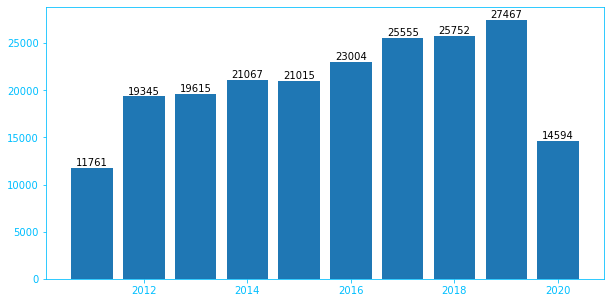

In [11]:
# Plotting the data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
rects = ax.bar(labels, counts)

# My editor has dark background. Bright blue should be visible for everybody.
ax.spines['bottom'].set_color('deepskyblue')
ax.spines['top'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['right'].set_color('deepskyblue')
ax.tick_params(axis='x', colors='deepskyblue')
ax.tick_params(axis='y', colors='deepskyblue')

# Display counts on top of bars
for rect, count in zip(rects, counts):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1*height, count, 
            ha='center', va='bottom')
plt.show()

Since 2011 economy has been recovering from the crisis, and the number of new cars registered has been steadily increasing (2020 don't have full data).

**<font color='green'>B. Exploring weight of new vehicles</font>**

Let's have a look at how much on average the passenger cars weigh. Discover if there is a trend to buy bigger, heavier cars or on the contrary, smaller lighter cars.

In [12]:
# I don't know the clean, consice functions to get average weights for each year, 
# so I wrote my own.

def average_feature_value(feature):
    sums_of_values = [0]*len(labels)
    for index, row in data.iterrows(): # slow slow slow
        index = labels.index(row[4]) 
        sums_of_values[index] += row[feature] * row['Arv'] # some rows represent multiple cars

    avg_values = []
    for i in range(len(labels)):
        average_for_this_year = round(sums_of_values[i] / counts[i])
        avg_values.append(average_for_this_year)
    return avg_values    
        
avg_weights = average_feature_value('Tühimass')
print(avg_weights)

[1501, 1515, 1516, 1504, 1505, 1526, 1532, 1533, 1549, 1567]


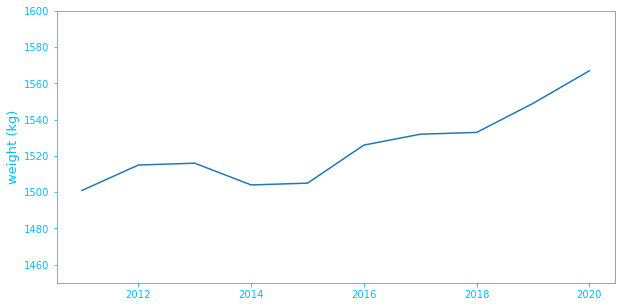

In [13]:
# Plot the results
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
rects = ax.plot(labels, avg_weights)

ax.spines['bottom'].set_color('deepskyblue')
ax.spines['top'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['right'].set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')
ax.tick_params(axis='x', colors='deepskyblue')
ax.tick_params(axis='y', colors='deepskyblue')
axes = plt.gca()
axes.set_ylim([1450,1600])
plt.ylabel('weight (kg)', fontsize=13)
plt.show()

In [14]:
print(sum(avg_weights)/len(avg_weights))

1524.8


It seems that there is a slight trend upwards, but nothing overly significant. Let's have a look at engines now.

**<font color='green'>C. Average engine capacities (cubic cm's) </font>**

I would have preferred to look at how powerful (kW) and eco-friendly (CO2 levels) the newly registered cars were, but the data was inconsistent, and I could not conclude anything meaningful out of that.

In [15]:
avg_engine_sizes = average_feature_value('Mootori maht')
print(avg_engine_sizes)

[1768, 1752, 1768, 1730, 1682, 1689, 1660, 1635, 1630, 1630]


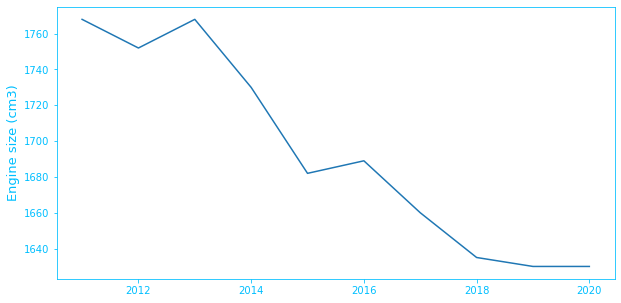

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
rects = ax.plot(labels, avg_engine_sizes)

ax.spines['bottom'].set_color('deepskyblue')
ax.spines['top'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['right'].set_color('deepskyblue')
ax.tick_params(axis='x', colors='deepskyblue')
ax.tick_params(axis='y', colors='deepskyblue')
ax.yaxis.label.set_color('deepskyblue')
plt.ylabel('Engine size (cm3)', fontsize=13)

plt.show()

Now that's interesting. We can see that average engine sizes have dropped about 0.15L in less than ten years. That's like a 7-9% drop. 

It would be interesting to have data about fuel economy, engine power, and CO2 levels also, but we have that data since 2016 only :/ 

**<font color='green'>D. Engine type preferences (petrol, diesel, gas) </font>**

Let's have a look which fuel types have gained or lost popularity.

In [17]:
data['Mootori tüüp'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Elekter', 'CNG, LPG', 'Electric'],
      dtype=object)

In [18]:
# Saving data for plotting
diesels = [0] * len(labels)
petrols = [0] * len(labels)
hybrids = [0] * len(labels)
gases = [0] * len(labels)
electrics = [0] * len(labels)
for index, row in data.iterrows(): 
    year = row[4]
    idx_in_labels = labels.index(year)
    fuel = row[5]
    if (fuel == 'Diesel'):
        diesels[idx_in_labels] += 1
    elif (fuel == 'Petrol'):
        petrols[idx_in_labels] += 1 
    elif (fuel == 'Hybrid'):
        hybrids[idx_in_labels] += 1  
    elif (fuel == 'CNG, LPG'):
        gases[idx_in_labels] += 1
    elif (fuel == 'Electric'):
        electrics[idx_in_labels] += 1    
    

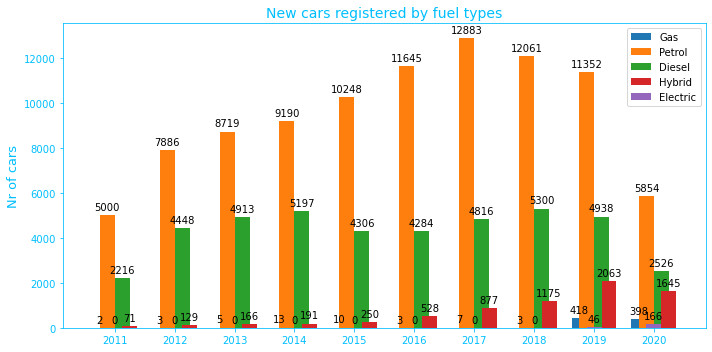

In [19]:
import numpy as np
plt.rcParams["figure.figsize"] = (10,5)

x = np.arange(len(labels))
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, gases, width, label='Gas')
rects2 = ax.bar(x - width/2, petrols, width, label='Petrol')
rects3 = ax.bar(x + width/2, diesels, width, label='Diesel')
rects4 = ax.bar(x + width, hybrids, width, label='Hybrid')
rects5 = ax.bar(x, electrics, width, label='Electric')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nr of cars', fontsize=13)
ax.set_title('New cars registered by fuel types', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Coloring
ax.spines['bottom'].set_color('deepskyblue')
ax.spines['top'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['right'].set_color('deepskyblue')
ax.tick_params(axis='x', colors='deepskyblue')
ax.tick_params(axis='y', colors='deepskyblue')
ax.yaxis.label.set_color('deepskyblue')
ax.title.set_color('deepskyblue')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

fig.tight_layout()

plt.show()

We can see that by far the most popular fuel type is petrol. Diesel sales have been quite stable over the years. But we can see a clear trend that alternative, eco-friendly fuel types are becoming increasingly popular.

Now I have reached a point where I don't know what to do. Taking on this subject I had some vague idea of scanning through data and mysteriously discovering some features X, Y, Z, that make people buy cars A, B and C. Now I realize I had no idea what I was going to achieve. 

I will just try to predict the body type ('Keretüüp'). If manufacturer ('Mark') and model ('Mudel') are known, it should be pretty accurate.

# 3. Predicting body type based on other features.

TODO Explain why this algo

In [20]:
data = copy
copy = data

In [21]:
data_dum = pd.get_dummies(data, columns=["Kategooria", "Mark", "Mudel", "Mootori tüüp"])
data_dum

,Keretüüp,Esm reg aasta,Mootori maht,Tühimass,Arv,Kategooria_M1,Kategooria_M1G,Mark_ALFA ROMEO,Mark_ALPINE,Mark_ASTON MARTIN,...,Mudel_Z4 SDRIVE 35IS,Mudel_ZAFIRA,Mudel_ZAFIRA TOURER,Mudel_ZOE,"Mootori tüüp_CNG, LPG",Mootori tüüp_Diesel,Mootori tüüp_Electric,Mootori tüüp_Elekter,Mootori tüüp_Hybrid,Mootori tüüp_Petrol
5283,SEDAAN,2011,1968,1540.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5284,UNIVERSAAL,2011,1798,1585.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5285,SEDAAN,2011,2995,1815.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5286,SEDAAN,2011,1968,1650.0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5287,SEDAAN,2011,2967,1795.0,2,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152306,UNIVERSAAL,2020,1969,2050.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152307,MAHTUNIVERSAAL,2020,1969,2165.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152308,MAHTUNIVERSAAL,2020,1969,2237.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152309,MAHTUNIVERSAAL,2020,1969,2320.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
labels

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [23]:
from sklearn.model_selection import train_test_split

labels = data['Keretüüp']
data_dum = data_dum.drop(columns=['Keretüüp'])

X_train, X_test, y_train, y_test = train_test_split(data_dum, labels, train_size=0.7, 
                                                    random_state=0)
print("The number of test instances: ", len(X_test))
print("The % of the whole set:", (len(X_test)/data.shape[0])*100)

The number of test instances:  43933
The % of the whole set: 30.00027314568225


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

results_df = pd.DataFrame(columns=['model', 'accuracy'])
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
acc = accuracy_score(y_test, prediction) # compares the actual result and prediction
results_df = results_df.append({'model': '1-NN', 'accuracy': acc }, ignore_index=True)

results_df

,model,accuracy
0,1-NN,0.929893


In [25]:
print(len(prediction))

43933


In [26]:
pd.set_option('display.max_rows', 50)
just_a_df = pd.DataFrame({'Actual': y_test,
                          'Predicted': prediction})
just_a_df

,Actual,Predicted
76959,UNIVERSAAL,UNIVERSAAL
103352,UNIVERSAAL,UNIVERSAAL
80643,LUUKPÄRA,LUUKPÄRA
104467,LUUKPÄRA,LUUKPÄRA
136339,UNIVERSAAL,UNIVERSAAL
...,...,...
124040,UNIVERSAAL,UNIVERSAAL
119468,LUUKPÄRA,LUUKPÄRA
86781,MAHTUNIVERSAAL,MAHTUNIVERSAAL
17768,SEDAAN,SEDAAN


In [27]:
same_values = 0
for index, row in just_a_df.iterrows():
    if (row['Actual'] == row['Predicted']):
        same_values += 1

In [28]:
print(same_values/len(y_test))

0.9298932465344957
